In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('font', family='NanumBarunGothic') 
warnings.filterwarnings('ignore')

In [77]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/4. Project/Mini Project/데이터분석프로젝트_VER2_210329_210926.xlsx')

## 데이터 전처리

결제 상태가 완료인 사람들과 type이 환불상태가 아닌 payment상태인 사람들만 선택

In [78]:
# 결제가 완료된 사람들
cp = df[df['state']=='COMPLETED']
len(cp)

62763

In [79]:
# type이 refund 상태인 사람들을 따로 뽑아서 사용
df_refund = df[df['type']=='REFUND']
len(df_refund)

3824

In [80]:
# type이 payment 상태인 사람들
cp = cp[cp['type']=='PAYMENT']
len(cp)

52902

In [81]:
cp.head(1)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2,970657.0,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.0,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04


## 데이터 결측값 확인하고 처리하기

In [82]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52902 entries, 2 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      52902 non-null  float64       
 1   customer_id             52902 non-null  float64       
 2   course_id               50922 non-null  float64       
 3   type                    52902 non-null  object        
 4   state                   52902 non-null  object        
 5   course_title            52901 non-null  object        
 6   category_title          52899 non-null  object        
 7   format                  52901 non-null  object        
 8   completed_at            52902 non-null  datetime64[ns]
 9   transaction_amount      52902 non-null  float64       
 10  coupon_title            23761 non-null  object        
 11  coupon_discount_amount  23761 non-null  float64       
 12  sale_price              51833 non-null  float

In [83]:
cp.isna().sum()

id                            0
customer_id                   0
course_id                  1980
type                          0
state                         0
course_title                  1
category_title                3
format                        1
completed_at                  0
transaction_amount            0
coupon_title              29141
coupon_discount_amount    29141
sale_price                 1069
tax_free_amount            1069
pg                         9872
method                        0
subcategory_title          9435
marketing_start_at         9344
dtype: int64

In [84]:
# 보안상의 이유로 공개불가한 column이라 삭제
cp = cp.drop('tax_free_amount', 1)

In [85]:
# coupon_title이 빈상태인 사람들을 쿠폰을 사용안한것으로 간주하여 '사용안함'을 채워넣음
cp['coupon_title'].fillna('사용안함', inplace=True)

In [86]:
# coupon_discount_amount가 비어있는 사람들을 사용안한것으로 간주하여 0.0을 채워넣음
cp['coupon_discount_amount'].fillna(0.0,inplace=True)

In [87]:
# pg가 비어있는 사람들을 다른 결제 방법으로 결제 한것으로 간주하여 'ETC'를 채워넣음
cp['pg'].fillna('ETC', inplace=True)

In [88]:
# 빈 데이터가 너무 많아서 삭제 id=117129
cp.drop(index=47361, axis=0, inplace=True)

In [89]:
# 카테고리 내의 '해당없음' 채워넣기
cp.loc[cp['course_title'].str.contains('프론트엔드') , 'subcategory_title'] = '프론트엔드 개발'
cp.loc[cp['course_title'].str.contains('게임') , 'subcategory_title'] = '게임'
cp.loc[cp['course_title'].str.contains('코딩') , 'subcategory_title'] = '코딩 입문'
cp.loc[cp['course_title'].str.contains('개발자') , 'subcategory_title'] = '개발자 커리어'
cp.loc[cp['course_title'].str.contains('데이터') , 'subcategory_title'] = '데이터 사이언스'

In [90]:
# 카테고리가 없는것으로 간주해서 '해당없음'으로 채워넣음
cp['category_title'].fillna('해당없음', inplace=True)

In [15]:
# transcation_amount가 0, sale_price값이 1 인 항목들은 전부 셈플 강의거나 테스트용이었으므로 삭제
cond = cp[(cp['transaction_amount']==0)&(cp['sale_price']==1)].index
cp.drop(cond, inplace=True)

In [98]:
cp.loc[(cp.course_title.str.contains('영상') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '영상 편집'
cp.loc[(cp.course_title.str.contains('프론트엔드') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '프론트엔드 개발'
cp.loc[(cp.course_title.str.contains('딥러닝') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '딥러닝/인공지능'
cp.loc[(cp.course_title.str.contains('모바일앱') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '모바일앱'
cp.loc[(cp.course_title.str.contains('개발자') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('백엔드') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '백엔드 개발'
cp.loc[(cp.course_title.str.contains('인공지능') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '딥러닝/인공지능'
cp.loc[(cp.course_title.str.contains('PPT') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = 'PPT/보고서'
cp.loc[(cp.course_title.str.contains('보고서') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = 'PPT/보고서'
cp.loc[(cp.course_title.str.contains('DevOps') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = 'DevOps'
cp.loc[(cp.course_title.str.contains('UX/UI') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = 'UX/UI'
cp.loc[(cp.course_title.str.contains('모션그래픽') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '모션그래픽'
cp.loc[(cp.course_title.str.contains('업무자동화') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '업무자동화'
cp.loc[(cp.course_title.str.contains('SNS') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = 'SNS마케팅'
cp.loc[(cp.course_title.str.contains('디지털 마케팅') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
cp.loc[(cp.course_title.str.contains('그로스 마케팅') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
cp.loc[(cp.course_title.str.contains('데이터 기반') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
cp.loc[(cp.course_title.str.contains('마케팅 한끝세트') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
cp.loc[(cp.course_title.str.contains('마케팅 백과사전') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
cp.loc[(cp.course_title.str.contains('풀스택 마케터') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
cp.loc[(cp.course_title.str.contains('개인화 마케팅') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
cp.loc[(cp.course_title.str.contains('마테크') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
cp.loc[(cp.course_title.str.contains('B2B') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = 'B2B'
cp.loc[(cp.course_title.str.contains('마케팅 벼락치기') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
cp.loc[(cp.course_title.str.contains('게임개발') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '게임'
cp.loc[(cp.course_title.str.contains('게임 제작') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '게임'
cp.loc[(cp.course_title.str.contains('게임 디자인') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '게임 그래픽'
cp.loc[(cp.course_title.str.contains('모델링') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '게임 그래픽'
cp.loc[(cp.course_title.str.contains('부동산 투자') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '부동산 투자'
cp.loc[(cp.course_title.str.contains('부동산 디벨로퍼') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '부동산 개발'
cp.loc[(cp.course_title.str.contains('부동산 재테크') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '부동산 투자'
cp.loc[(cp.course_title.str.contains('부동산 개발') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '부동산 개발'
cp.loc[(cp.course_title.str.contains('엑셀') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '엑셀/VBA'
cp.loc[(cp.course_title.str.contains('데이터분석') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
cp.loc[(cp.course_title.str.contains('시각디자인') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '시각디자인'
cp.loc[(cp.course_title.str.contains('재무제표') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
cp.loc[(cp.course_title.str.contains('자금조달') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
cp.loc[(cp.course_title.str.contains('금융ㆍ투자') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '금융/투자 실무'
cp.loc[(cp.course_title.str.contains('재무/세무') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
cp.loc[(cp.course_title.str.contains('회계') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
cp.loc[(cp.course_title.str.contains('포토샵&일러스트레이터') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '디자인툴'
cp.loc[(cp.course_title.str.contains('일러스트') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '일러스트'
cp.loc[(cp.course_title.str.contains('VFX') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = 'VFX'
cp.loc[(cp.course_title.str.contains('웹 개발') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '백엔드 개발'
cp.loc[(cp.course_title.str.contains('컴퓨터 공학') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('투자의 정석') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '주식 투자'
cp.loc[(cp.course_title.str.contains('마스터 코딩') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '코딩 입문'
cp.loc[(cp.course_title.str.contains('기업분석') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '주식 투자'
cp.loc[(cp.course_title.str.contains('클론코딩') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '코딩 입문'
cp.loc[(cp.course_title.str.contains('ADsP') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
cp.loc[(cp.course_title.str.contains('풀스택 개발') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('개발 풀스택') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('웹 프로그래밍') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '백엔드 개발'
cp.loc[(cp.course_title.str.contains('데이터 사이언스') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
cp.loc[(cp.course_title.str.contains('리팩터링') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('마케터') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '마케터'
cp.loc[(cp.course_title.str.contains('SQL') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
cp.loc[(cp.course_title.str.contains('HTML/CSS') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '프론트엔드 개발'
cp.loc[(cp.course_title.str.contains('코딩+알고리즘') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('자연어') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '딥러닝/인공지능'
cp.loc[(cp.course_title.str.contains('앱개발') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('데이터') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
cp.loc[(cp.course_title.str.contains('파이썬 자동화') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('비즈니스 영어') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '커뮤니케이션'
cp.loc[(cp.course_title.str.contains('스피치 10분컷') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '커뮤니케이션'
cp.loc[(cp.course_title.str.contains('디자인') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '디자인툴'
cp.loc[(cp.course_title.str.contains('알고리즘') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('Financial Modeling') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('Spring') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('데이터베이스') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
cp.loc[(cp.course_title.str.contains('데이터사이언스') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
cp.loc[(cp.course_title.str.contains('파이썬') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('객체지향') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('React') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('코딩') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('데이터기반') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
cp.loc[(cp.course_title.str.contains('개발') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
cp.loc[(cp.course_title.str.contains('데이터 사이언스') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
cp.loc[(cp.course_title.str.contains('데이터 분석') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
cp.loc[(cp.course_title.str.contains('빅데이터') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
cp.loc[(cp.course_title.str.contains('금융/투자') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '금융/투자 실무'
cp.loc[(cp.course_title.str.contains('기업투자') ==True)&cp.subcategory_title.isnull(),'subcategory_title'] = '주식 투자'
cp.loc[cp.subcategory_title.isnull(),'subcategory_title'] = '기타'

In [99]:
# course_id가 없는 코스들은 프로모션으로 인해 없는것이므로 삭제
cp['course_id'].replace('', np.nan, inplace=True)
cp.dropna(subset=['course_id'], inplace=True)

In [100]:
cp['sale_price'].replace('', np.nan, inplace=True)
cp.dropna(subset=['sale_price'],inplace=True)

In [101]:
cp.reset_index(inplace=True)

In [102]:
df_refund.reset_index(inplace=True)
len(df_refund)

3824

In [103]:
cp.isna().sum()

index                        0
id                           0
customer_id                  0
course_id                    0
type                         0
state                        0
course_title                 0
category_title               0
format                       0
completed_at                 0
transaction_amount           0
coupon_title                 0
coupon_discount_amount       0
sale_price                   0
pg                           0
method                       0
subcategory_title            0
marketing_start_at        6397
dtype: int64

## 데이터 분석

### 할인을 받아 결제한 사람들의 비율

Initial thoughts 
*   할인이 되는 강의일수록 결제 수가 더욱더 많을 것이다


In [24]:
len(cp[cp['sale_price']!=cp['transaction_amount']])

23874

In [25]:
len(cp[cp['sale_price']==cp['transaction_amount']])

24788

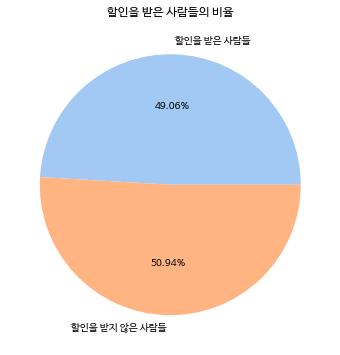

In [23]:
# 할인을 받은 사람들 
plt.figure(figsize=(8,6))
coupon_usage = [len(cp[cp['sale_price']!=cp['transaction_amount']]), len(cp[cp['sale_price']==cp['transaction_amount']])]
location = ['할인을 받은 사람들','할인을 받지 않은 사람들']
colors = sns.color_palette('pastel')
plt.pie(coupon_usage, labels=location, colors=colors, autopct='%1.2f%%')
plt.title('할인을 받은 사람들의 비율')
plt.show()

할인이 되는 강의일수록 결제 수가 더욱더 많을 것이다라는 예측을 벗어나는것으로 확인

### 여러개의 강의를 들은 사람

In [26]:
# id가 같은 중복값 찾기 
dup_id = cp.duplicated(['id'])
dup_id.sum()

0

In [27]:
# customer_id가 같으면 한사람
dup_cid = cp.duplicated(['customer_id'])
dup_cid.sum()

In [28]:
# 제일 많이 들은 사람을 찾아보자
cp[cp['customer_id'].duplicated()]['customer_id'].value_counts()

98685.0     52
427973.0    46
158374.0    41
50769.0     38
3189.0      38
            ..
280208.0     1
457156.0     1
561991.0     1
113580.0     1
384003.0     1
Name: customer_id, Length: 7214, dtype: int64

In [29]:
# 제일 많이 들은 사람을 분석해보자
len(cp[cp['customer_id']==98685.0])

53

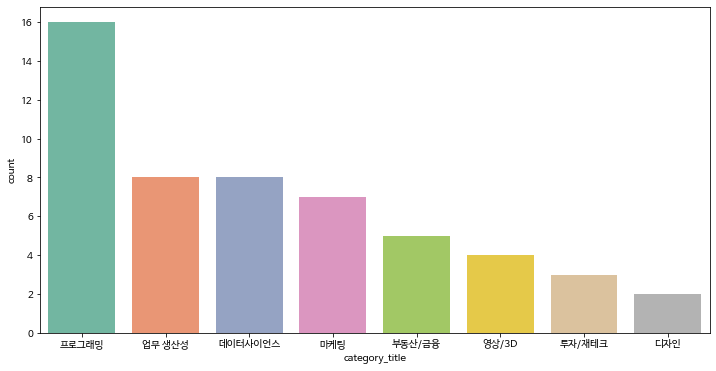

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(data=cp[cp['customer_id']==98685.0], x='category_title', order = cp[cp['customer_id']==98685.0]['category_title'].value_counts().index, palette='Set2')
plt.show()

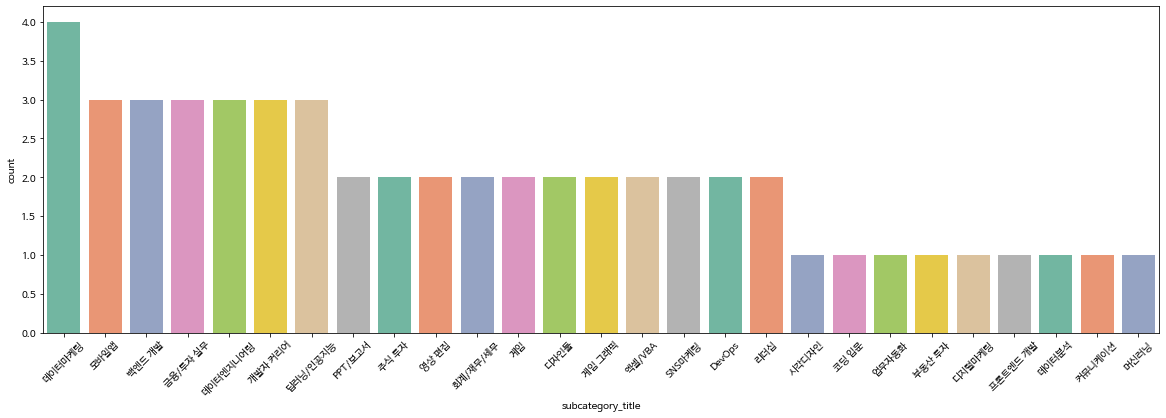

In [31]:
plt.figure(figsize=(20,6))
sns.countplot(data=cp[cp['customer_id']==98685.0], x='subcategory_title', order = cp[cp['customer_id']==98685.0]['subcategory_title'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.show()

프로그래밍 과목들을 제일 많이 듣는것으로 보여진다

In [32]:
cp[cp['customer_id']==98685.0]

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
2266,5119,984635.0,98685.0,201998.0,PAYMENT,COMPLETED,올인원 패키지 : iOS 앱 개발,프로그래밍,올인원,2021-04-01 10:19:28,24800.0,수강생 50만명 돌파 기념 감사제 쿠폰,87200.0,112000.0,ETC,CARD,모바일앱,2020-01-14 00:00:00
2804,6337,988664.0,98685.0,204342.0,PAYMENT,COMPLETED,"올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기",마케팅,올인원,2021-04-03 00:08:50,55300.0,GA4 30% 할인쿠폰,23700.0,79000.0,ETC,CARD,데이터마케팅,2021-04-02 00:00:00
3061,6936,990338.0,98685.0,201798.0,PAYMENT,COMPLETED,올인원 패키지 : 브랜딩 2020,마케팅,올인원,2021-04-04 10:08:51,162100.0,사용안함,0.0,162100.0,ETC,CARD,SNS마케팅,2019-11-11 00:00:00
8882,22011,1037244.0,98685.0,200399.0,PAYMENT,COMPLETED,올인원 패키지 : 리더를 위한 HR/인재경영,업무 생산성,올인원,2021-04-28 21:10:57,0.0,4월 1+1 페이백 이벤트 쿠폰,162100.0,111000.0,ETC,PROMOTION,리더십,2019-03-22 00:00:00
8883,22012,1037248.0,98685.0,201849.0,PAYMENT,COMPLETED,올인원 패키지 : 그로스 마케팅,마케팅,올인원,2021-04-28 21:11:43,0.0,4월 1+1 페이백 이벤트 쿠폰,178000.0,123000.0,ETC,PROMOTION,데이터마케팅,2019-11-25 00:00:00
8884,22014,1037252.0,98685.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-04-28 21:12:57,153300.0,초격차 패키지 : 한번에 끝내는 3D 디자인툴 30% 할인 쿠폰,65700.0,219000.0,INICIS,CARD,디자인툴,2021-04-23 00:00:00
9536,23448,1041392.0,98685.0,204775.0,PAYMENT,COMPLETED,입만 열면 인정받는 스피치 10분컷,업무 생산성,하루10분컷,2021-04-30 09:21:48,19500.0,사용안함,0.0,19500.0,INICIS,CARD,커뮤니케이션,2021-04-28 00:00:00
11534,28280,1054819.0,98685.0,204773.0,PAYMENT,COMPLETED,이것만 배우면 끝 PPT 10분컷,업무 생산성,하루10분컷,2021-05-06 09:33:53,19900.0,사용안함,0.0,19900.0,INICIS,CARD,PPT/보고서,2021-04-28 00:00:00
13379,33455,1069671.0,98685.0,204631.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,프로그래밍,올인원,2021-05-13 23:03:57,69000.0,[럭키룰렛] 올인원패키지,10000.0,79000.0,INICIS,CARD,백엔드 개발,NaT
20136,50612,1127326.0,98685.0,201520.0,PAYMENT,COMPLETED,올인원 패키지 : AWS/Docker 클라우드 서버 구축,프로그래밍,올인원,2021-06-08 11:12:38,32500.0,5월 페이백 프로모션 쿠폰,80000.0,112500.0,INICIS,CARD,DevOps,NaT


In [33]:
len(df_refund[df_refund['customer_id']==98685.0])

0

53개의 과목중 환불을 한개도 신청하지 않은거로 보인다

### Sale price 분석

In [36]:
pd.DataFrame(cp['sale_price'].groupby(cp['completed_at'].dt.strftime("%m")).mean())

,sale_price
completed_at,
03,132054.925102
04,140354.882550
05,126673.387905
06,136165.491905
07,159724.854407
08,166216.060742
09,181751.260975


금액들이 계속 증가한거로 보여진다

### 수강생이 많은 과목 분석

In [35]:
cp['course_id'].value_counts()

203720.0    1422
203525.0    1416
203178.0    1216
204670.0    1062
204631.0     826
            ... 
206850.0       1
204682.0       1
206622.0       1
203992.0       1
207556.0       1
Name: course_id, Length: 369, dtype: int64

코스명 [초격차 패키지 : 한 번에 끝내는 프론트엔드 개발]가 제일 수강생이 많은 과목


In [37]:
cp[cp['course_id'] == 203720.0].head(1) # 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
4,14,970676.0,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02


In [40]:
# 월마다 바뀐 판매가격
pd.DataFrame(cp[cp['course_id'] == 203720.0]['sale_price'].groupby(cp['completed_at'].dt.strftime("%m")).median())

,sale_price
completed_at,
03,111000.0
04,113000.0
05,115000.0
06,116000.0
07,136000.0
08,156000.0
09,179000.0


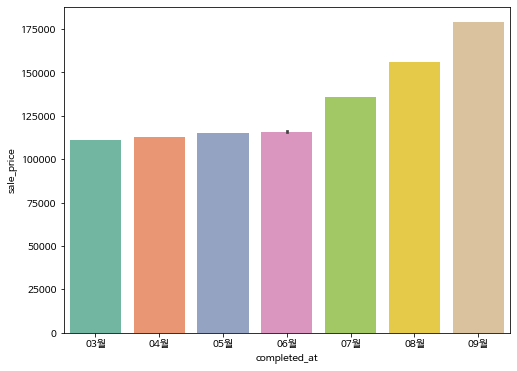

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(cp[cp['course_id'] == 203720.0]['completed_at'].dt.strftime('%m월'), cp[cp['course_id'] == 203720.0]['sale_price'], palette='Set2')
plt.show()

In [42]:
pd.DataFrame(cp[cp['course_id'] == 203720.0]['completed_at'].dt.strftime('%m').value_counts())

,completed_at
04,330
05,311
06,245
08,204
07,166
09,94
03,72


In [43]:
pd.DataFrame(cp[cp['course_id'] == 203720.0]['sale_price'].value_counts())

,sale_price
113000.0,330
115000.0,311
116000.0,245
156000.0,204
136000.0,165
179000.0,94
111000.0,72
109000.0,1


3월달에 가격이 제일쌌는데 결제횟수가 적은걸로 봐서 마케팅이 덜되었던 것으로 예상된다


### 콘텐츠 기획 분석

카테고리와 서브카테고리를 분석해서 어떤 콘텐츠를 많이 구매하는지를 확인해보자

#### 카테고리 분석

In [44]:
cp['category_title'].unique()

array(['프로그래밍', '업무 생산성', '영상/3D', '부동산/금융', '디자인', '데이터사이언스', '마케팅',
       '크리에이티브', '투자/재테크', '교육', '관리', '데이터 사이언스', '비즈니스', '지식콘텐츠'],
      dtype=object)

In [45]:
pd.DataFrame(cp['category_title'].value_counts())

,category_title
프로그래밍,15954
업무 생산성,6442
데이터사이언스,6253
디자인,5706
영상/3D,5146
마케팅,4503
부동산/금융,2760
투자/재테크,1490
크리에이티브,321
교육,53


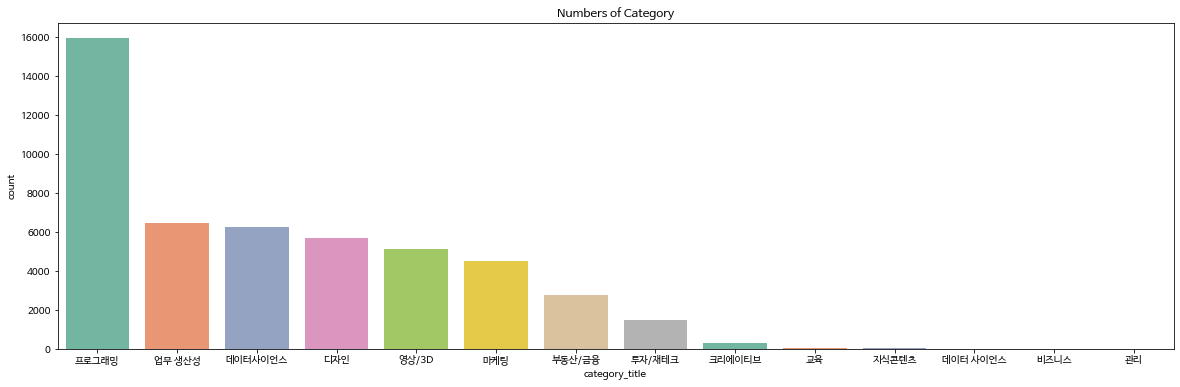

In [47]:
plt.figure(figsize=(20,6))
sns.countplot(data=cp, x='category_title', order = cp['category_title'].value_counts().index, palette='Set2')
plt.title('Numbers of Category')
plt.show()

카테고리를 분석해봤을때 프로그래밍 과목을 수강하는 사람들이 압도적으로 많은걸 볼 수 있다 

In [48]:
# '데이터사이언스'가 아닌 '데이터 사이언스' 카테고리 체크 
# 관리자가 공백을 붙여서 따로 분류되는걸로 예상 
cp[cp['category_title']=='데이터 사이언스']

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
18981,47407,1117146.0,4340.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 18:26:18,310000.0,사용안함,0.0,310000.0,PAYCO,CARD,데이터분석,2021-05-21
18996,47448,1117311.0,549527.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 20:17:25,310000.0,사용안함,0.0,310000.0,INICIS,CARD,데이터분석,2021-05-21
19002,47462,1117346.0,274620.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 20:32:30,310000.0,사용안함,0.0,310000.0,INICIS,CARD,데이터분석,2021-05-21
19006,47477,1117420.0,550126.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 21:06:23,310000.0,사용안함,0.0,310000.0,KAKAO,POINT,데이터분석,2021-05-21
19013,47509,1117539.0,238166.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 22:31:51,310000.0,사용안함,0.0,310000.0,INICIS,CARD,데이터분석,2021-05-21


In [51]:
cp[cp['course_title'].str.contains('SQL 100제')].head()

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
3445,7871,992871.0,474939.0,204622.0,PAYMENT,COMPLETED,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터사이언스,온라인 완주반,2021-04-05 12:22:59,390000.0,사용안함,0.0,390000.0,ETC,CARD,데이터분석,2021-04-05
3570,8223,993961.0,389482.0,204622.0,PAYMENT,COMPLETED,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터사이언스,온라인 완주반,2021-04-06 00:22:22,390000.0,사용안함,0.0,390000.0,ETC,CARD,데이터분석,2021-04-05
3614,8320,994302.0,389482.0,204622.0,PAYMENT,COMPLETED,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터사이언스,온라인 완주반,2021-04-06 11:18:22,312000.0,[20% 할인] 완주반 1주년 기념 쿠폰,78000.0,390000.0,ETC,CARD,데이터분석,2021-04-05
4207,9728,998971.0,15551.0,204622.0,PAYMENT,COMPLETED,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터사이언스,온라인 완주반,2021-04-08 17:45:58,312000.0,[20% 할인] 완주반 1주년 기념 쿠폰,78000.0,390000.0,INICIS,CARD,데이터분석,2021-04-05
4377,10157,1000599.0,488865.0,204622.0,PAYMENT,COMPLETED,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터사이언스,온라인 완주반,2021-04-09 13:20:03,312000.0,[완주반 1주년 기념 20% 할인 쿠폰],78000.0,390000.0,INICIS,CARD,데이터분석,2021-04-05


같은 course_title에 '데이터사이언스' 카테고리를 가진 과목이 있는걸로 봐서 관리자가 category_title을 잘못 입력하는 실수를 했다고 보여진다

In [49]:
# category title이 '데이터 사이언스'인것들을 '데이터사이언스'로 수정
cp.loc[cp['category_title']=='데이터 사이언스' , 'category_title'] = '데이터사이언스'

#### 서브 카테고리 분석

In [52]:
cp['subcategory_title'].unique()

array(['프론트엔드 개발', 'PPT/보고서', '영상 편집', '회계/재무/세무', 'DevOps', 'UX/UI',
       '머신러닝', '모션그래픽', '딥러닝/인공지능', '글쓰기/카피라이팅', '데이터분석', '디지털마케팅',
       '엑셀/VBA', '모바일앱', '업무자동화', 'SNS마케팅', '백엔드 개발', '게임', '개발자 커리어',
       '부동산 개발', '시각디자인', '데이터마케팅', '디자인툴', '금융/투자 실무', '코딩 입문', '기타',
       '커뮤니케이션', '부동산 투자', '리더십', '주식 투자', '마케터', 'B2B', '일러스트', '게임 그래픽',
       '데이터엔지니어링', 'VFX'], dtype=object)

In [53]:
pd.DataFrame(cp['subcategory_title'].value_counts())

,subcategory_title
백엔드 개발,3782
영상 편집,3628
개발자 커리어,3525
프론트엔드 개발,3240
데이터분석,2678
엑셀/VBA,2418
딥러닝/인공지능,2368
PPT/보고서,2253
디자인툴,1983
모바일앱,1803


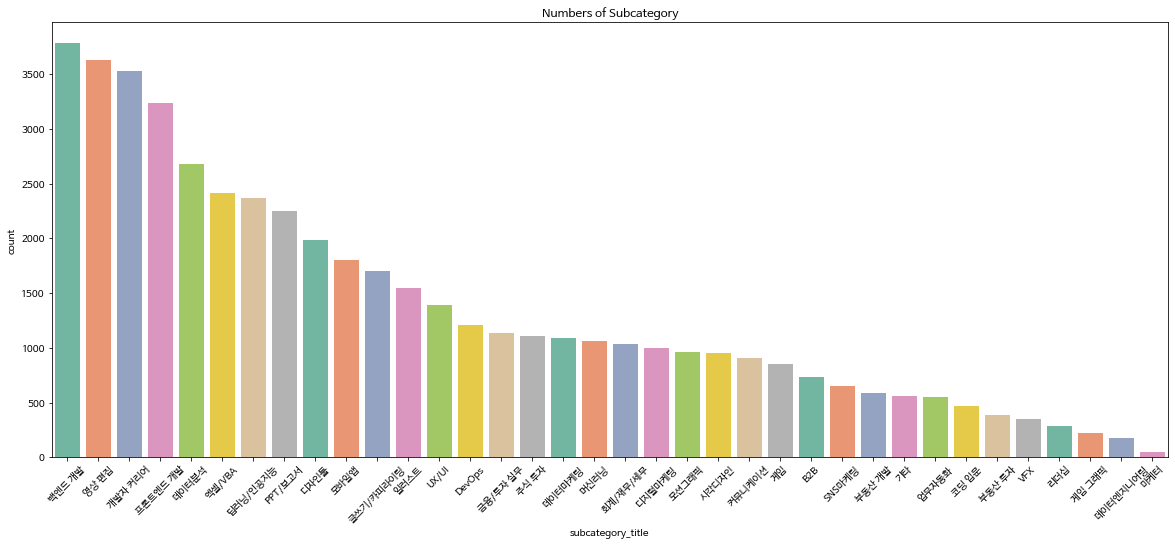

In [54]:
plt.figure(figsize=(20,8))
sns.countplot(data=cp, x='subcategory_title', order = cp['subcategory_title'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title('Numbers of Subcategory')
plt.show()

서브 카테고리를 분석 해봤을때 영상편집 강의의 수가 제일 많고


그 다음으로 프로그래밍 과목들 (백엔드 개발, 개발자 커리어, 프론트엔드 개발, 딥러닝/인공지능)의 수강수가 많은것으로 분석이 된다

In [56]:
pd.DataFrame(cp.pivot_table(index=['category_title','subcategory_title'], aggfunc='size'))

0
category_title subcategory_title      
관리             기타                    1
교육             B2B                  53
데이터사이언스        B2B                   1
               데이터분석              2651
               데이터엔지니어링            178
               딥러닝/인공지능           2368
               머신러닝               1060
디자인            UX/UI              1308
               디자인툴               1900
               시각디자인               950
               일러스트               1548
마케팅            SNS마케팅              652
               글쓰기/카피라이팅          1703
               기타                    4
               데이터마케팅             1090
               데이터분석                 1
               디지털마케팅             1000
               마케터                  53
부동산/금융         개발자 커리어               2
               금융/투자 실무           1133
               부동산 개발              586
               엑셀/VBA                2
               회계/재무/세무           1037
비즈니스           기타                    2
               엑셀/VBA                1
               커뮤니케이션                2
업무 생산성         PPT/보고서            2253
               기타                   96
               리더십                 284
               업무자동화               487
               엑셀/VBA             2415
               커뮤니케이션              907
영상/3D          VFX                 351
               게임 그래픽              222
               모션그래픽               953
               영상 편집              3620
지식콘텐츠          기타                   23
크리에이티브         B2B                   2
               UX/UI                83
               기타                  215
               디자인툴                  4
               모션그래픽                 9
               영상 편집                 8
투자/재테크         부동산 투자              384
               주식 투자              1106
프로그래밍          B2B                 681
               DevOps             1210
               개발자 커리어            3523
               게임                  856
               기타                  221
               데이터분석                26
               디자인툴                 79
               모바일앱               1803
               백엔드 개발             3782
               업무자동화                60
               코딩 입문               473
               프론트엔드 개발           3240

큰 카테고리에서는 프로그래밍을 듣는 사람들이 제일 많은것으로 보이고 서브 카테고리 중에서는 영상/3D의 영상편집을 듣는 사람이 제일 많다

그러므로 프로그래밍 과목들과 영상 편집을 위주로 마케팅을 하면 효과를 볼수 있을것으로 보여진다


#### format 분석

In [57]:
cp['format'].unique()

array(['스쿨 온라인', '올인원', 'RED', '온라인 완주반', 'B2B 온라인', '캠프', '이벤트',
       '하루10분컷', '아카이브', '관리', 'B2B', 'MBA', 'B2G'], dtype=object)

In [60]:
pd.DataFrame(cp['format'].value_counts())

,format
올인원,41475
RED,3215
온라인 완주반,1362
하루10분컷,1339
스쿨 온라인,357
B2B,352
B2G,348
이벤트,82
B2B 온라인,56
아카이브,31


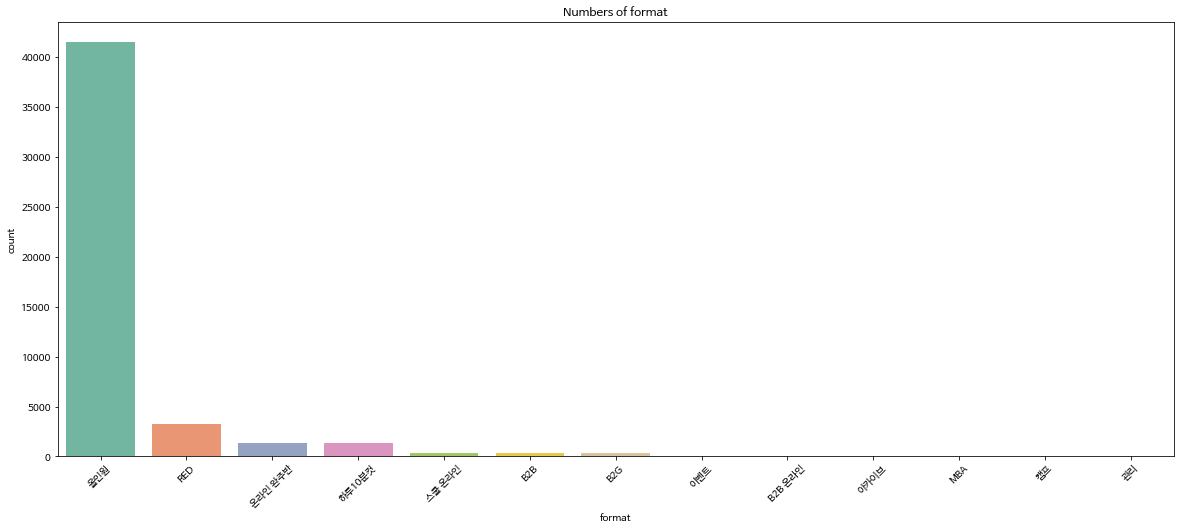

In [61]:
plt.figure(figsize=(20,8))
sns.countplot(data=cp, x='format', order = cp['format'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title('Numbers of format')
plt.show()

올인원 format이 압도적으로 많은것으로 보아 사람들은 한번 결제에 여러가지 강의가 들어있는것을 선호하는 타입인것 같다 

마케팅 방향을 올인원을 광고하는것으로 잡아서 하는게 판매율을 높을 수있을것 같다


#### 환불율이 높은 강의

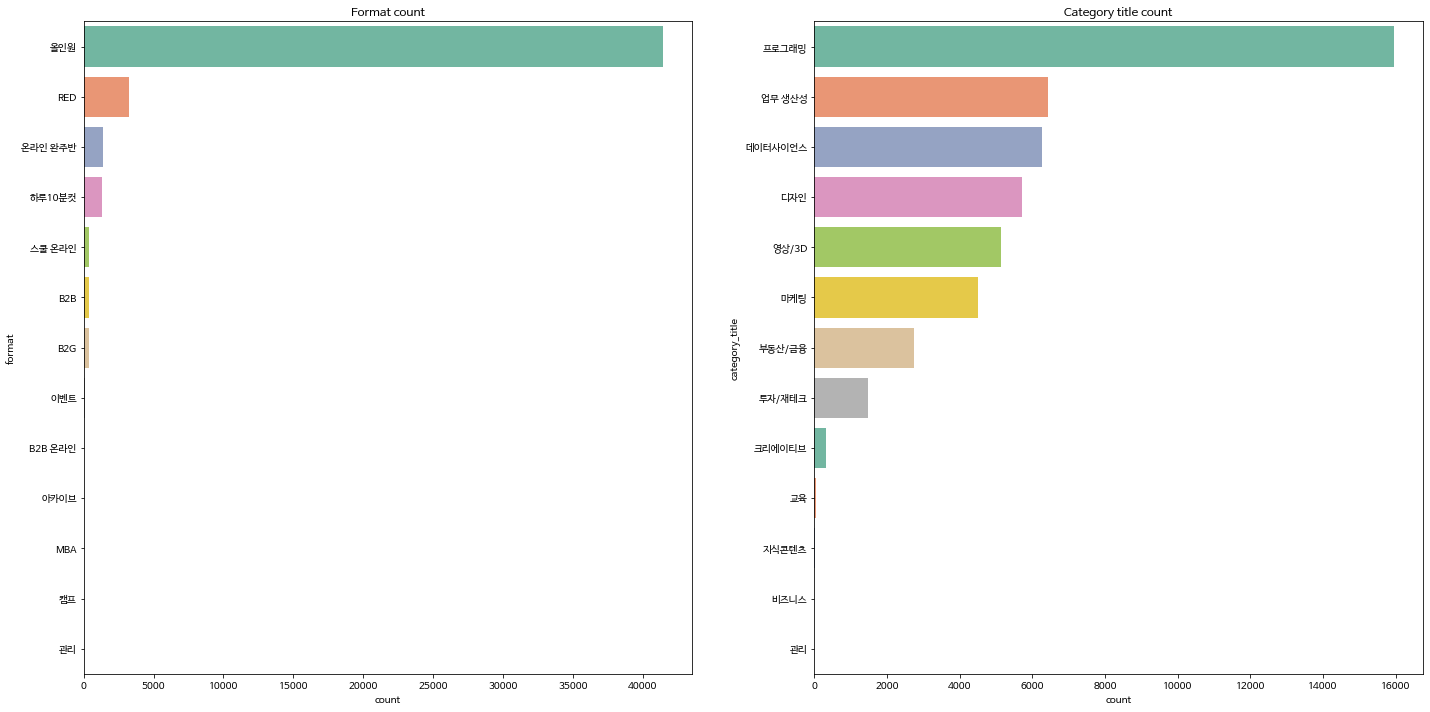

In [62]:
# 결제 완료된 강의들을 포맷과 카테고리로 분류
plt.figure(figsize=(24,12))
plt.rc("font", family="NanumBarunGothic")
plt.subplot(1,2,1)
sns.countplot(data=cp, y='format', order = cp['format'].value_counts().index, palette='Set2')
plt.title('Format count')
plt.subplot(1,2,2)
sns.countplot(data=cp, y='category_title', order = cp['category_title'].value_counts().index, palette='Set2')
plt.title('Category title count')
plt.show()

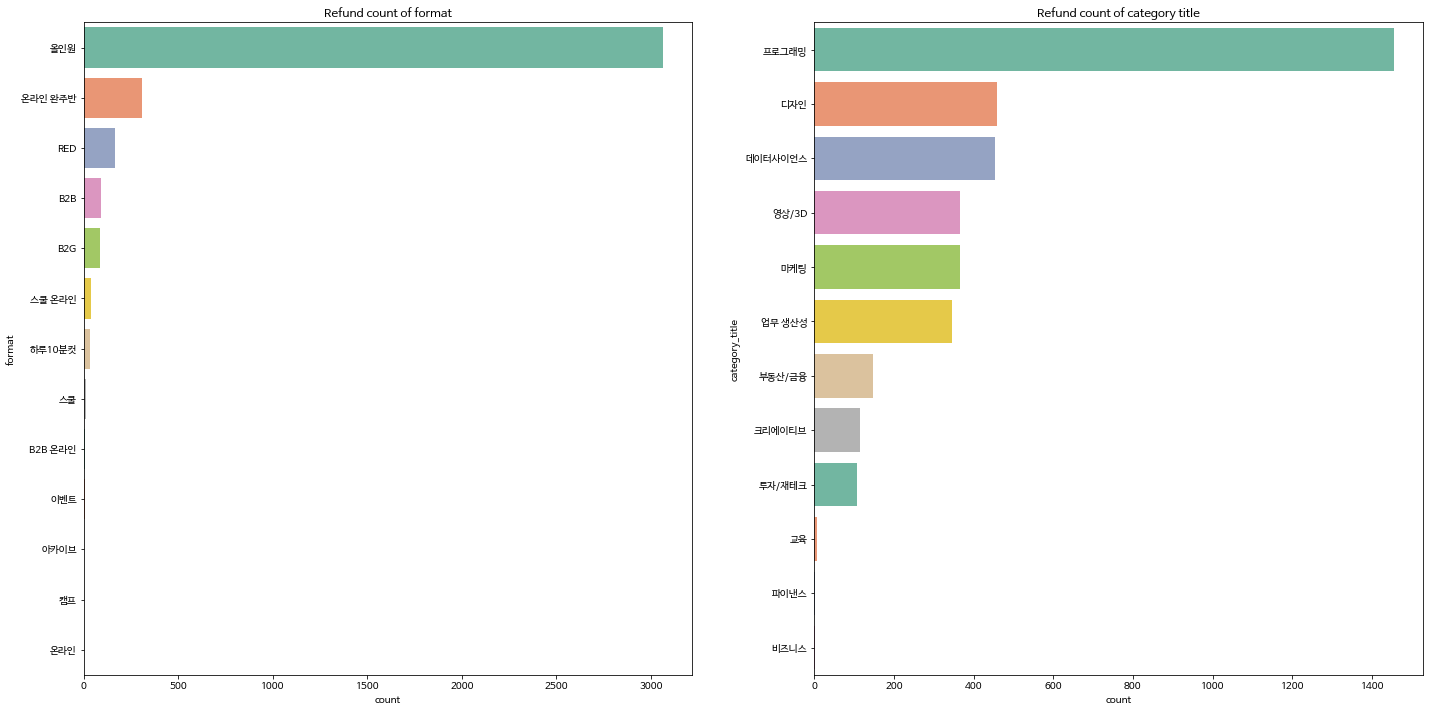

In [63]:
# 환불된 강의들을 포맷과 카테고리로 분류
plt.figure(figsize=(24,12))
plt.rc("font", family="NanumBarunGothic")
plt.subplot(1,2,1)
sns.countplot(data=df_refund, y='format', order = df_refund['format'].value_counts().index, palette='Set2')
plt.title('Refund count of format')
plt.subplot(1,2,2)
sns.countplot(data=df_refund, y='category_title', order = df_refund['category_title'].value_counts().index, palette='Set2')
plt.title('Refund count of category title')
plt.show()

결제된 강의의 포맷이 올인원인 강의가 제일 많고, 카테고리에서는 프로그래밍이 제일 많기 때문에 

환불된 강의 중에서 포맷이 올인원인 강의와 카테고리가 프로그래밍인 강의가 제일 많다

In [64]:
df_refund['course_id'].value_counts()

203720.0    121
203525.0    105
204631.0     68
204871.0     65
203787.0     64
           ... 
200000.0      1
200252.0      1
2516.0        1
204897.0      1
207648.0      1
Name: course_id, Length: 307, dtype: int64

In [65]:
df_refund[df_refund['course_id']==203720.0].head()

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
34,1198,973764.0,474332.0,203720.0,REFUND,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-29 14:58:53,-111000.0,NaN,NaN,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
71,3314,979626.0,478035.0,203720.0,REFUND,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-31 10:18:25,-91000.0,NaN,NaN,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
75,3361,979764.0,429291.0,203720.0,REFUND,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-31 10:44:06,-91000.0,NaN,NaN,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
119,5249,985071.0,481652.0,203720.0,REFUND,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-04-01 13:16:59,-91000.0,NaN,NaN,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
133,5345,985382.0,456332.0,203720.0,REFUND,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-04-01 15:15:21,-91000.0,NaN,NaN,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02


In [66]:
cp[cp['course_id'] == 203720.0].head()

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
4,14,970676.0,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02
13,40,970730.0,445723.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:15:46,91000.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02
19,59,970795.0,477890.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:55:41,91000.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02
29,84,970892.0,478134.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 17:57:43,91000.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02
92,315,971530.0,477986.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 21:58:21,91000.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02


### 결제된 시간 분석

####결제 완료 시간 월별과 마케팅 시작된 시기 비교

In [67]:
# 결제 완료 시간을 월별로 나눠서 분석
pd.DataFrame(cp['completed_at'].dt.strftime('%Y년 %m월').value_counts())

,completed_at
2021년 08월,8923
2021년 04월,8344
2021년 05월,8185
2021년 06월,8030
2021년 07월,7624
2021년 09월,5353
2021년 03월,2203


In [68]:
# 마케팅이 시작된 시기 분석
pd.DataFrame(cp['marketing_start_at'].dt.strftime('%Y년 %m월').value_counts())

,marketing_start_at
2021년 04월,5335
2021년 02월,5278
2021년 06월,4396
2021년 07월,3971
2020년 12월,3736
2021년 03월,2173
2021년 05월,2042
2021년 08월,1773
2021년 01월,1655
2020년 03월,1414


*   2019년과 2020년에는 마케팅 횟수가 적고 2021년 2월부터 크게 증가해서 4월부터 증가해서 8월까지는 판매수가 많아진걸로 보여진다
*   2021년 9월에는 마케팅 횟수가 현저히 떨어졌기때문에 9월 판매수가 떨어진것으로 보인다

####결제 완료 시간대 분석

In [69]:
pd.DataFrame(cp['completed_at'].dt.strftime('%Y년 %m월 %H시').value_counts())

,completed_at
2021년 08월 23시,738
2021년 04월 23시,687
2021년 08월 22시,685
2021년 05월 23시,663
2021년 06월 23시,657
...,...
2021년 06월 04시,25
2021년 03월 05시,11
2021년 03월 06시,10
2021년 03월 04시,8


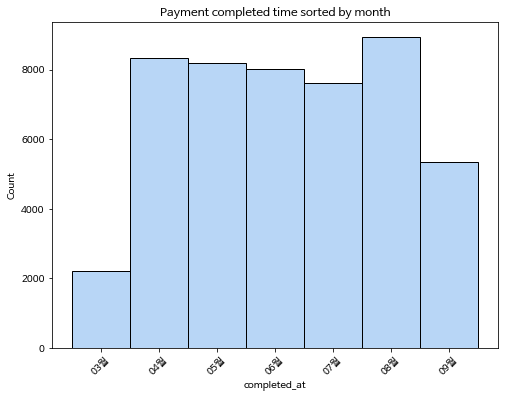

In [70]:
plt.figure(figsize=(8,6))
sns.set_palette("pastel")
sns.histplot(cp['completed_at'].dt.strftime('%m월'))
plt.xticks(rotation=45)
plt.title('Payment completed time sorted by month')
plt.show()

#### 결제된 시간

In [71]:
pd.DataFrame(cp['completed_at'].dt.strftime('%H시').value_counts())

,completed_at
23시,3929
22시,3668
21시,3184
16시,3030
15시,2926
17시,2845
14시,2828
18시,2803
10시,2722
20시,2710


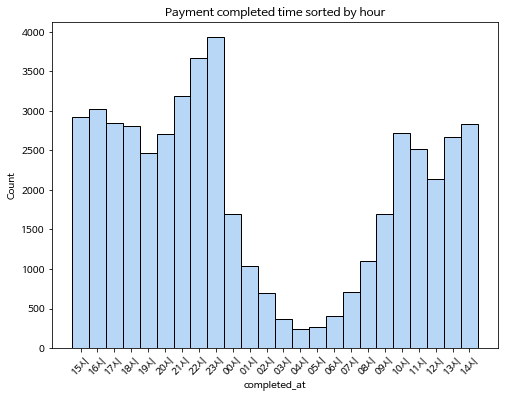

In [72]:
# 결제된 시간 분포 
plt.figure(figsize=(8,6))
sns.set_palette('pastel')
sns.histplot(cp['completed_at'].dt.strftime('%H시'))
plt.xticks(rotation=45)
plt.title('Payment completed time sorted by hour')
plt.show()

결제된 시간의 분포에 따르면 9시에서 11시 사이에 결제가 많이 된것으로 보아 

직장인들이 일을 마치고 퇴근후 결제한것으로 예상을 해볼수 있을 것 같다

#### 환불된 시간

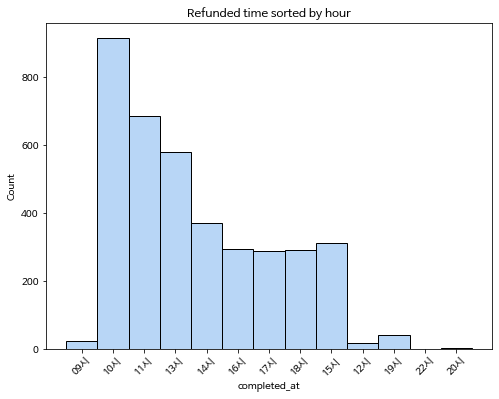

In [73]:
plt.figure(figsize=(8,6))
sns.set_palette('pastel')
sns.histplot(df_refund['completed_at'].dt.strftime('%H시'))
plt.xticks(rotation=45)
plt.title('Refunded time sorted by hour')
plt.show()

환불된 시간을 보면 10시에서 새벽 한시까지 많은 걸로 봐서 
* 9시에서 11시 사이에 결제를 하고 강의를 들어보고 자기한테 맞지 않아 환불을 한것으로 예상된다


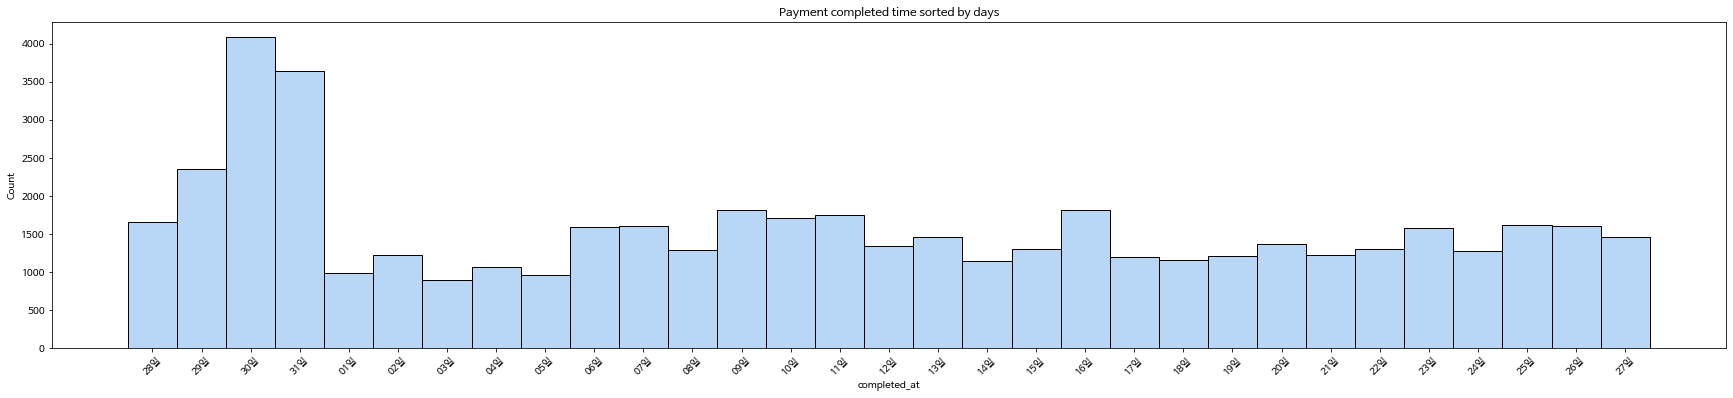

In [74]:
plt.figure(figsize=(30,6))
sns.set_palette('pastel')
sns.histplot(cp['completed_at'].dt.strftime('%d일'))
plt.xticks(rotation=45)
plt.title('Payment completed time sorted by days')
plt.show()

28일부터 증가하기 시작해서 월말까지 결제률이 높았다

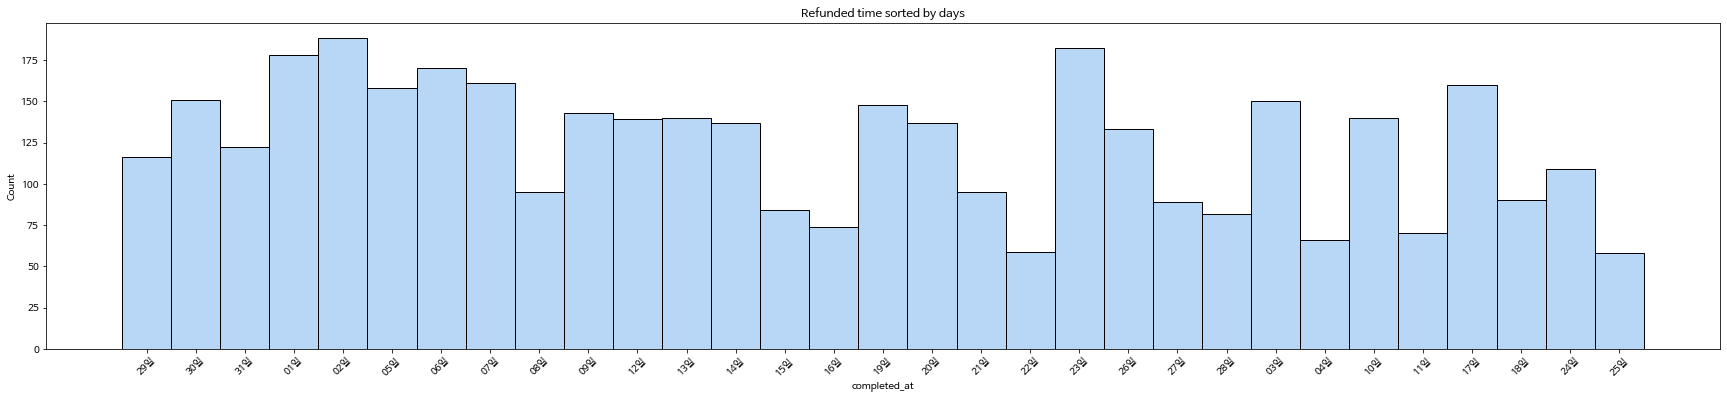

In [76]:
plt.figure(figsize=(30,6))
sns.set_palette('pastel')
sns.histplot(df_refund['completed_at'].dt.strftime('%d일'))
plt.xticks(rotation=45)
plt.title('Refunded time sorted by days')
plt.show()

일별 환불에서는 뚜렷한 패턴을 찾을수가 없었다